Primer Punto

In [2]:
s1=(1,2,3,4)
s2=(3,4,5,6)
s3=(2,3,5,6)
s4=(4,5,5,6)
sa=(1,3,3,1)
sb =(1,7,1,8)


def convexa(s, s1):
   
    x1, y1 = min(s[0], s[2]), min(s[1], s[3])
    x2, y2 = max(s[0], s[2]), max(s[1], s[3])
    x3, y3 = min(s1[0], s1[2]), min(s1[1], s1[3])
    x4, y4 = max(s1[0], s1[2]), max(s1[1], s1[3])
    if x1>x4 or x3>x2 or y1>y4 or y3>y2:
            
        print("Los segmentos no se intersectan")
        return None
    
    a= s1[0]-s1[2]
    b= s[2]-s[0]
    c= s1[1]-s1[3]
    d= s[3]-s[1]
    pl= (a*d)-(b*c) 
    
    if pl == 0:
        #Tienen pendientes iguales 
        if (max(s[0], s1[0])== min(s[2], s1[2])) and (max(s[1], s1[1]) == min(s[3], s1[3]) ):
            print("se intersectan en un punto extremo ")
        else:
            print("Se intersectan en un intervalo")
        return (max(s[0], s1[0]), max(s[1], s1[1])), (min(s[2], s1[2]), min(s[3], s1[3]))
    
    
    
    
    det1 = (s[0]*s[3]) - (s[1] * s[2] )
    det2 = (s1[0]*s1[3]) - (s1[1] * s1[2] )
    w = (s[0]*s[3]) - (s1[1] * s1[2] ) - (s[1]- s[3]) * (s1[0] - s1[2])
    print("Los segmentos se intersectan en el punto :")
    x = (det1 * (s1[0] - s1[2]) - (s[0] - s[2]) * det2) / w
    y = (det1 * (s1[1] - s1[3]) - (s[1] - s[3]) * det2)  / w
    return x,y
   
    
    

print(convexa(s1,s2))
print(convexa(s1,s3))
print(convexa(s1,s4))

se intersectan en un punto extremo 
((3, 4), (3, 4))
Se intersectan en un intervalo
((2, 3), (3, 4))
Los segmentos no se intersectan
None


Primero se evalua si los segmentos no se intersectan, de ser asi el algoritmo se para, de lo contrario se procede a evaluar si tienen pendientes iguales, de ser asi se tiene que se intersectan en un punto o un intervalo porque no se activo el condicional anterior, por lo que se retorna el punto extremo o el intervalo segun el caso, finalmente si la pendiente no es igual los segmentos se intersectan en un punto, y se utilizan los determinantes de las coordenadas de los dos puntos para hallarlo, se crearon dos puntos mas para probar situaciones que no se dan con los 4 puntos originales 

Segundo Punto 

Para la implementacion de este algoritmo me base en una implementacion recursiva del algoritmo de dividir y conquistar , primero se crean funciones basicas "crear_lista" que prepara los puntos para el algoritmo y "det" que define una ecuacion que sera usada varias veces en el algoritmo, posteriormente se implementa la funcion hull que basicamente envia a la izquierda o derecha los puntos en la lista actualizando el set original, luego se implementa la funcion recursiva que ignora los puntos que no son extremos, ya que no hacen parte del conjunto final y utiliza la funcion anterior para dividir dichos puntos en la parte superior e inferior del hull, finalmente se ingresan los puntos al algoritmo y se llama la funcion "convexa_recursiva" , y el algoritmo saca una lista de puntos del convex hull.    

Asi se toman estos puntos y se grafican de color azul mientras que los otros son de color rojo, por lo que el algoritmo fue implementado correctamente 

[(0.1991, 1.562), (0.1991, 3.0293), (0.7345, 4.7487), (1.2508, 0.1982), (1.2734, 4.9885), (3.968, 3.5959), (4.0876, 0.2972), (4.9466, 1.2667)]


([<matplotlib.lines.Line2D at 0x7f72a56d38b0>],
 [<matplotlib.lines.Line2D at 0x7f72a56d3b80>])

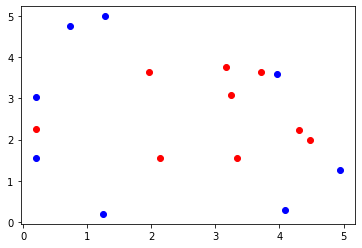

In [4]:
import matplotlib.pyplot as plt

class Point:
    
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
 
    def __hash__(self):
        return hash(self.x)
 
    def __ne__(self, other):
        return not self == other
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
 
    def __gt__(self, other):
        if self.x > other.x:
            return True
        elif self.x == other.x:
            return self.y > other.y
        return False
 
    def __repr__(self):
        return  f"({self.x}, {self.y})"
    
    def __ge__(self, other):
        if self.x > other.x:
            return True
        elif self.x == other.x:
            return self.y >= other.y
        return False
 
    def __le__(self, other):
        if self.x == other.x:
            return self.y <= other.y
        elif self.x < other.x:
            return True
        else:
            return False
    
def crear_lista(lista):
    puntos = []
    for p in lista:
        puntos.append(Point(p[0], p[1]))
    return puntos
 
def det(a, b, c):
    det = (a.x * b.y + b.x * c.y + c.x * a.y) - (a.y * b.x + b.y * c.x + c.y * a.x)
    return det
 
def hull(points, left, right, convex_set):
    
    if points:
        ex_p = None
        extreme_point_distance = float("-inf")
        puntos = []
 
        for p in points:
            d = det(left, right, p)
 
            if d > 0:
                puntos.append(p)
 
                if d > extreme_point_distance:
                    extreme_point_distance = d
                    ex_p = p
 
        if ex_p:
            hull(puntos, left, ex_p, convex_set)
            convex_set.add(ex_p)
            hull(puntos, ex_p, right, convex_set)

def convexa_recursiva(points):
    p = sorted(crear_lista(points))
    n = len(p)
    p_iz = p[0]
    p_der = p[n - 1]
    tup = {p_iz, p_der}
    u_hull = []
    l_hull = []
 
    for i in range(1, n - 1):
        d = det(p_iz, p_der, p[i])
 
        if d > 0:
            u_hull.append(p[i])
        elif d < 0:
            l_hull.append(p[i])
 
    hull(u_hull, p_iz, p_der, tup)
    hull(l_hull, p_der, p_iz, tup)
 
    return sorted(tup)
 
 
def main():
    points = [(4.4761, 1.994), (4.9466, 1.2667), (0.1991, 3.0293), 
              (1.2734, 4.9885), (1.9589, 3.6342), (3.7172, 3.6357), (4.0876, 0.2972), 
              (4.304, 2.2281), (3.2383, 3.0908), (3.1682, 3.7495), (0.7345, 4.7487), 
              (3.968, 3.5959), (1.2508, 0.1982), (0.1991, 2.256), (0.1991, 1.562), 
              (2.134, 1.562), (3.334, 1.562)]
   
    results_recursive = convexa_recursiva(points)
    print(results_recursive)
 
if __name__ == "__main__":
    main()
    
fig, ax = plt.subplots()

ax.plot(4.4761, 1.994, 'ro'), ax.plot(4.9466, 1.2667, 'bo'), ax.plot(0.1991, 3.0293, 'bo') 
ax.plot(1.2734, 4.9885, 'bo'), ax.plot(1.9589, 3.6342, 'ro'), ax.plot(3.7172, 3.6357, 'ro'), ax.plot(4.0876, 0.2972, 'bo')
ax.plot(4.304, 2.2281, 'ro'), ax.plot(3.2383, 3.0908, 'ro'), ax.plot(3.1682, 3.7495, 'ro'), ax.plot(0.7345, 4.7487, 'bo')
ax.plot(3.968, 3.5959, 'bo'), ax.plot(1.2508, 0.1982, 'bo'), ax.plot(0.1991, 2.256, 'ro'), ax.plot(0.1991, 1.562, 'bo') 
ax.plot(2.134, 1.562, 'ro'), ax.plot(3.334, 1.562, 'ro')






Ahora en cuanto a los modelos que se puden implementar utilizando este algoritmo, considero que seria principalmente el habitad natural de una especie de animales, sistema en el cual los animales serian los puntos y el hull seria el habitad, analogamente el sistema podria implementarse con especies de flores, plantas, arboles y demas.

Punto 3 

In [ ]:
import random
import heapq

def intersec(seg1, seg2):
    x1, y1 = seg1[0]
    x2, y2 = seg1[1]
    x3, y3 = seg2[0]  # Se cogen las componentes x y y de cada uno de los segmentos 
    x4, y4 = seg2[1]
    dx1,dy1 = x2-x1, y2-y1
    dx2,dy2 = x4-x3, y4-y3
    det = (dx1*dy2)-(dx2*dy1)
    if det == 0:
        return False  
    if max(x1, x2) < min(x3, x4) or max(x3, x4) < min(x1, x2) or max(y1, y2) < min(y3, y4) or max(y3, y4) < min(y1, y2):
        return False  # Se evaluan estas dos condiciones y en caso de que se cumplen retorna falso porque no se intersectan
    f1 = ((dx2*(y1-y3)-dy2*(x1-x3))/ det)
    f2 = ((dx1*(y1-y3)-dy1*(x1-x3))/ det)
    g1 = 0<=f1<=1
    g2 = 0<=f2<=1
    return g1 and g2  #Los segmentos se intersectan, se retorna de esta manera para evitar duplicados 
    
def linea_barrido(segmentos):
    eventos = []  #se crea un array para los eventos
    p= enumerate(segmentos)
    for i, segment in p:
        (x1,y1),(x2,y2) = segment #Las componentes x y y de ambos puntos se extraen del segmento 
        if x1>x2:
            segment = (segment[1],segment[0]) #Se ordenan los segmentos de tal manera que el primer punto del segmento este mas a la derecha 
            x1, y1, x2, y2 = x2, y2, x1, y1
        heapq.heappush(eventos, (x1, i, "left"))   #Se pone el elemento en la cola de eventos 
        heapq.heappush(eventos, (x2, i, "right")) #gracias a la funcion heappush se mantiene la invariante 
   
    intersecciones = []
    seg_intersec = []    # Segmentos de interseccion 
    seg_acts = set()  # Segmentos activos 
    while eventos: #Mientras haya eventos en el array de eventos se itera 
        x, i, tipo = heapq.heappop(eventos) #heap.pop retorna y elimina el elemento mas pequeno de eventos y los valores se guardan en x, i, tipo respectivamente
        segment = segmentos[i] #Se coge el segmento asociado al evento 
        if tipo == "left":
            for seg_act in seg_acts: #Se itera con respecto a la lista de segmentos activos 
                if intersec(seg_act, segment):
                    xa = (x - seg_act[0][0]) / (seg_act[1][0] - seg_act[0][0]) * (seg_act[1][1] - seg_act[0][1]) + seg_act[0][1]
                    #Se usa x y xa para saber el punto de interseccion con base al segmento activo  
                    intersecciones.append((x, xa )) #Se agrega el punto de interseccion 
                    seg_intersec.append((seg_act, segment)) #Se agrega a la lista de segmentos activos 
            seg_acts.add(segment) #Como es "left " se agrega el segmento a la lista de segmentos activos 
        else:
            seg_acts.remove(segment) #Como es "right" se elimina el segmento a l inicio al lugar de agregarlo al final  
            for seg_act in seg_acts: #Por lo demas es igual al caso "left "
                if intersec(seg_act, segment):
                    xa = (x - seg_act[0][0]) / (seg_act[1][0] - seg_act[0][0]) * (seg_act[1][1] - seg_act[0][1]) + seg_act[0][1]
                    intersecciones.append((x, xa))
                    seg_intersec.append((seg_act, segment))
    return intersecciones, seg_intersec 


segments = [((round(random.uniform(0, 20),4), round(random.uniform(0, 20),4)),
             (round(random.uniform(0, 20),4), round(random.uniform(0, 20),4))) 
            for _ in range(20)] #Se crean 20 segmentos aleatorios entre 0 y 20 con 4 decimales
print("Los segmentos son:")
for i in range(20):
    print(segments[i])  #Se imprimen los segmentos creados 


intersecciones, seg_intersec = linea_barrido(segments) #Se llama la funcion 

print(f"Se encontraron {len(intersecciones)} puntos y segmentos de interseccion:")
print("Puntos de interseccion")
for intersection in intersecciones: #Se imprimen los puntos de interseccion 
    print(intersection)

print("Segmentos de interseccion")
for segment1, segment2 in seg_intersec:
    print(segment1, "and", segment2) #Se imprimen los segmentos que se intersectan 


Bibliografia:
https://docs.python.org/3/library/heapq.html
https://python.algorithmexamples.com/web/divide_and_conquer/convex_hull.html

Mark de Berg, Otfried Cheong, Marc van Kreveld, Mark Overmars. Computational
Geometry – Algorithms and Applications. Tercera edición. Springer (2008).
